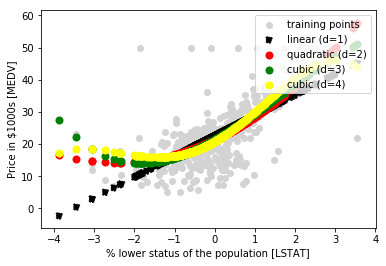

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

lr = LinearRegression()
pr = LinearRegression()
cr = LinearRegression()
qr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)

X_quad = quadratic.fit_transform(X)
X_cube = cubic.fit_transform(X)
X_quar = quartic.fit_transform(X)

# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# fit cube efatures
cr.fit(X_cube, y)
y_cube_fit = cr.predict(cubic.fit_transform(X_fit))

# fit quar featurs
qr.fit(X_quar, y)
y_quar_fit = qr.predict(quartic.fit_transform(X_fit))


y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
y_cube_pred = cr.predict(X_cube)
y_quar_pred = qr.predict(X_quar)

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# features to be predicted
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

"""
TODO: 
create simple linear regression and polynomial features degree 2, 3 and 4
fit a linear regression on those features
Get predicted value on four different polynomial features
"""

quartic = PolynomialFeatures(degree=6)
X_quartic = quartic.fit_transform(X)

'''
y_cubic_fit = ???
y_quartic_fit = ???
'''

# plot results
plt.scatter(X_std, y, label='training points', color='lightgray')

plt.scatter(X_std, y_lin_pred, 
         label='linear (d=1)', 
         color='black', 
         lw=2, 
         linestyle=':')

plt.scatter(X_std, y_quad_pred, 
         label='quadratic (d=2)',
         color='red', 
         lw=2,
         linestyle='-')

plt.scatter(X_std, y_cube_pred, 
         label='cubic (d=3)',
         color='green', 
         lw=2,
         linestyle='-')

plt.scatter(X_std, y_quar_pred, 
         label='cubic (d=4)',
         color='yellow', 
         lw=2,
         linestyle='-')

'''
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3)',
         color='green', 
         lw=2, 
         linestyle='--')

plt.plot(X_fit, y_quartic_fit, 
         label='quartic (d=4)',
         color='blue', 
         lw=2, 
         linestyle='--')
'''

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()